<a href="https://colab.research.google.com/github/saghar-trade/Time-series/blob/main/Extrapolation%26stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [2]:

# -----------------------------
N = 1000
# تولید نقاط تصادفی دوبعدی در بازه‌ی [-3, 3]
X = np.random.random((N, 2)) * 6 - 3
# تابع هدف: ترکیب دو تابع کسینوسی

In [3]:
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

In [4]:
models = {
    "SVR": SVR(kernel='rbf', C=10, gamma=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "NeuralNet": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=2000, random_state=42),
    "GaussianProcess": GaussianProcessRegressor()
}

In [5]:
for name, model in models.items():
    model.fit(X, Y)
    print(f"{name} trained ✅")

SVR trained ✅
RandomForest trained ✅
NeuralNet trained ✅
GaussianProcess trained ✅


In [6]:
grid_x = np.linspace(-6, 6, 60)
grid_y = np.linspace(-6, 6, 60)
xx, yy = np.meshgrid(grid_x, grid_y)
X_test = np.column_stack((xx.ravel(), yy.ravel()))

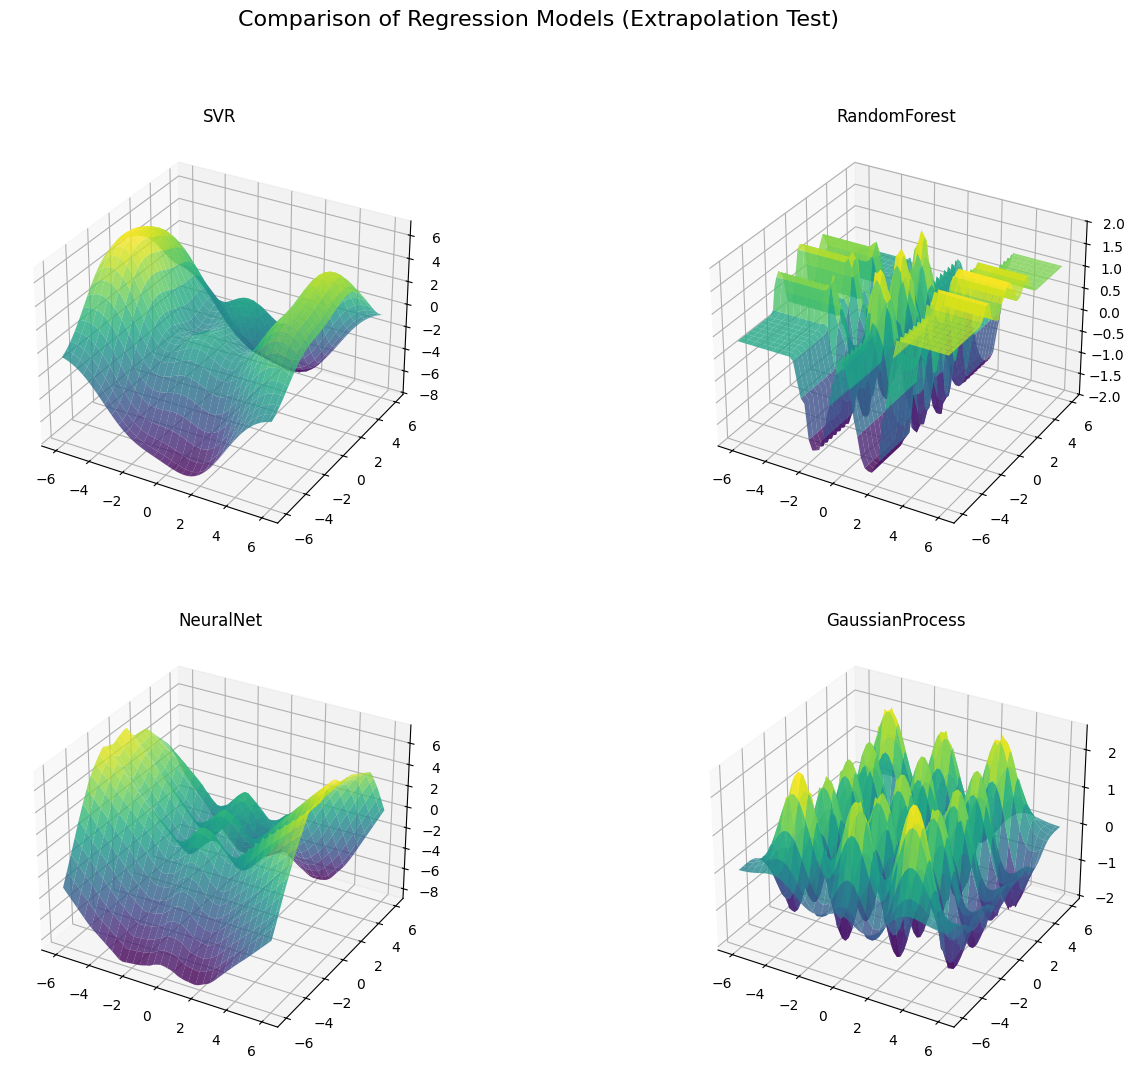

In [7]:
fig = plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(models.items(), 1):
    Z = model.predict(X_test).reshape(xx.shape)
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.8)
    ax.set_title(name)

plt.suptitle("Comparison of Regression Models (Extrapolation Test)", fontsize=16)
plt.show()

In [8]:
model = RandomForestRegressor()
model.fit(X, Y)

RandomForestRegressor()

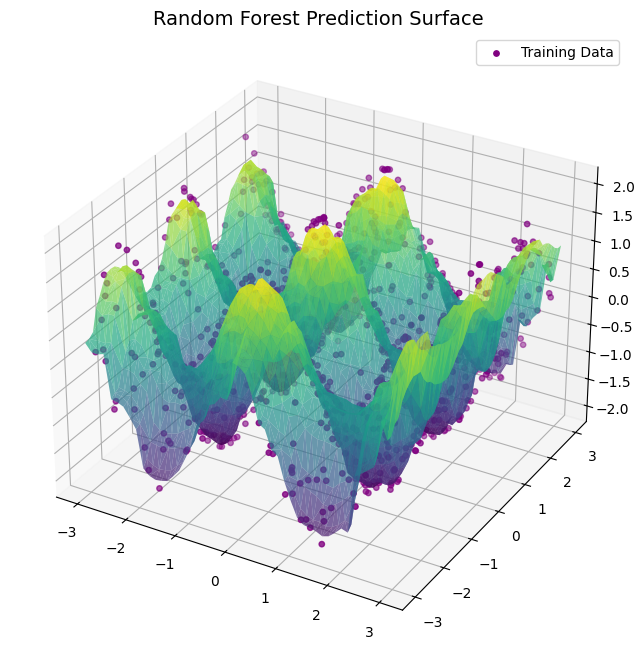

In [18]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='purple', s=15, label="Training Data")
# تعریف محدوده شبکه (grid)
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
# پیش‌بینی خروجی مدل روی کل شبکه
Yhat = model.predict(Xgrid).flatten()
# رسم سطح
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True, alpha=0.7, cmap='viridis')

ax.set_title("Random Forest Prediction Surface", fontsize=14)
ax.legend()
plt.show()

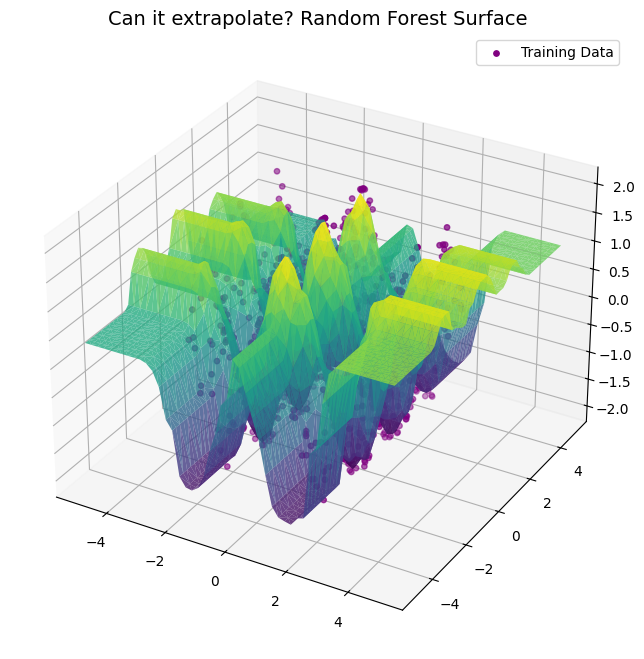

In [19]:
# 📊 بررسی توانایی مدل برای Extrapolation
# (پیش‌بینی بیرون از محدوده‌ی داده‌ی آموزش)

# رسم سطح پیش‌بینی
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# داده‌های آموزشی
ax.scatter(X[:, 0], X[:, 1], Y, color='purple', s=15, label="Training Data")

# تعریف شبکه‌ای از نقاط گسترده‌تر از محدوده‌ی آموزش (-5 تا +5)
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

# پیش‌بینی خروجی مدل روی شبکه‌ی جدید
Yhat = model.predict(Xgrid).flatten()

# رسم سطح پیش‌بینی
ax.plot_trisurf(
    Xgrid[:, 0],
    Xgrid[:, 1],
    Yhat,
    linewidth=0.2,
    antialiased=True,
    cmap='viridis',
    alpha=0.8
)

ax.set_title("Can it extrapolate? Random Forest Surface", fontsize=14)
ax.legend()
plt.show()


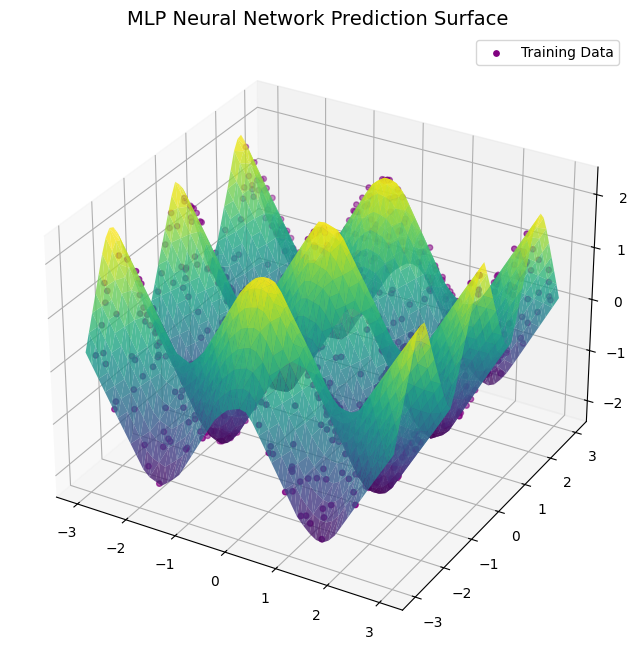

In [20]:
# تعریف و آموزش مدل MLP (شبکه عصبی چندلایه)
model = MLPRegressor(hidden_layer_sizes=(128,),
                     alpha=0.0,
                     learning_rate_init=0.01,
                     max_iter=2000,
                     random_state=42)
model.fit(X, Y)

# -----------------------------
# رسم سطح پیش‌بینی
# -----------------------------
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# نقاط داده‌ی واقعی
ax.scatter(X[:, 0], X[:, 1], Y, color='purple', s=15, label='Training Data')

# شبکه‌ی ورودی برای پیش‌بینی
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()

# رسم سطح پیش‌بینی
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True, cmap='viridis', alpha=0.8)

ax.set_title("MLP Neural Network Prediction Surface", fontsize=14)
ax.legend()
plt.show()

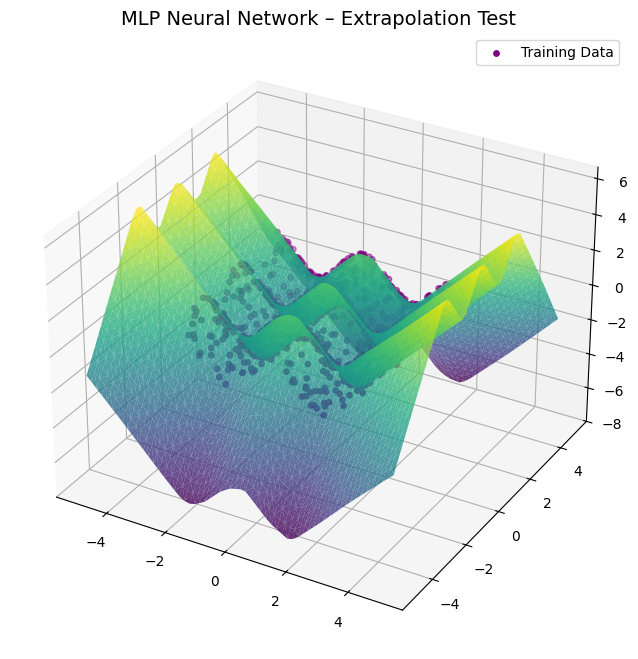

In [22]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# نقاط آموزشی (train data)
ax.scatter(X[:, 0], X[:, 1], Y, color='purple', s=15, label='Training Data')



# شبکه‌ی وسیع‌تر از محدوده‌ی آموزش
line = np.linspace(-5, 5, 60)    # از -5 تا +5 برای تست extrapolation
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

# پیش‌بینی مدل روی شبکه‌ی جدید
Yhat = model.predict(Xgrid).flatten()

# رسم سطح
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True, cmap='viridis', alpha=0.8)

# تنظیمات نمایشی
ax.set_title("MLP Neural Network – Extrapolation Test", fontsize=14)
ax.legend()
plt.show()


In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd

path = "/content/drive/MyDrive/SPY.csv"
df = pd.read_csv(path, index_col='Date', parse_dates=True)
print(df.head())


                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2010-01-04  112.370003  113.389999  111.510002  113.330002  92.246048   
2010-01-05  113.260002  113.680000  112.849998  113.629997  92.490204   
2010-01-06  113.519997  113.989998  113.430000  113.709999  92.555328   
2010-01-07  113.500000  114.330002  113.180000  114.190002  92.946060   
2010-01-08  113.889999  114.620003  113.660004  114.570000  93.255348   

               Volume  
Date                   
2010-01-04  118944600  
2010-01-05  111579900  
2010-01-06  116074400  
2010-01-07  131091100  
2010-01-08  126402800  


In [27]:
print("Shape:", df.shape)

# ---------------------------------------------------
# 2️⃣ Closeجدا کردن داده‌ی  به عنوان ورودی مدل
# ---------------------------------------------------
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()


Shape: (2263, 6)


In [28]:
Xtrain = []
ytrain = []

for t in range(len(train) - 1):
    x0 = train[t]
    x1 = train[t + 1]
    Xtrain.append([x0])
    ytrain.append(x1)

Xtest = []
ytest = []

for t in range(len(test) - 1):
    x0 = test[t]
    x1 = test[t + 1]
    Xtest.append([x0])
    ytest.append(x1)

Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)
Xtest = np.array(Xtest)
ytest = np.array(ytest)

print("Train shape:", Xtrain.shape, "Test shape:", Xtest.shape)

Train shape: (1999, 1) Test shape: (262, 1)


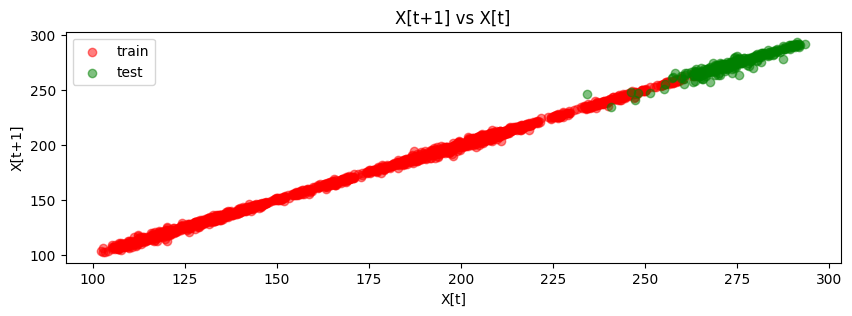

In [34]:
Xtrain = []
for t in range(len(train) - 1):
    Xtrain.append([train[t], train[t + 1]])  # ← دوتا مقدار

Xtest = []
for t in range(len(test) - 1):
    Xtest.append([test[t], test[t + 1]])

Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)


plt.figure(figsize=(10, 3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")

plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c='r', alpha=0.5, label='train')
plt.scatter(Xtest[:, 0], Xtest[:, 1], c='g', alpha=0.5, label='test')
plt.legend();


In [29]:
model = MLPRegressor(hidden_layer_sizes=(128,),
                     alpha=0.0,
                     learning_rate_init=0.01,
                     max_iter=5000,
                     random_state=42)
model.fit(Xtrain, ytrain)


MLPRegressor(alpha=0.0, hidden_layer_sizes=(128,), learning_rate_init=0.01,
             max_iter=5000, random_state=42)

In [30]:
# 5️⃣ پیش‌بینی روی داده‌ی تست (Extrapolation)
# ---------------------------------------------------
y_pred = model.predict(Xtest)

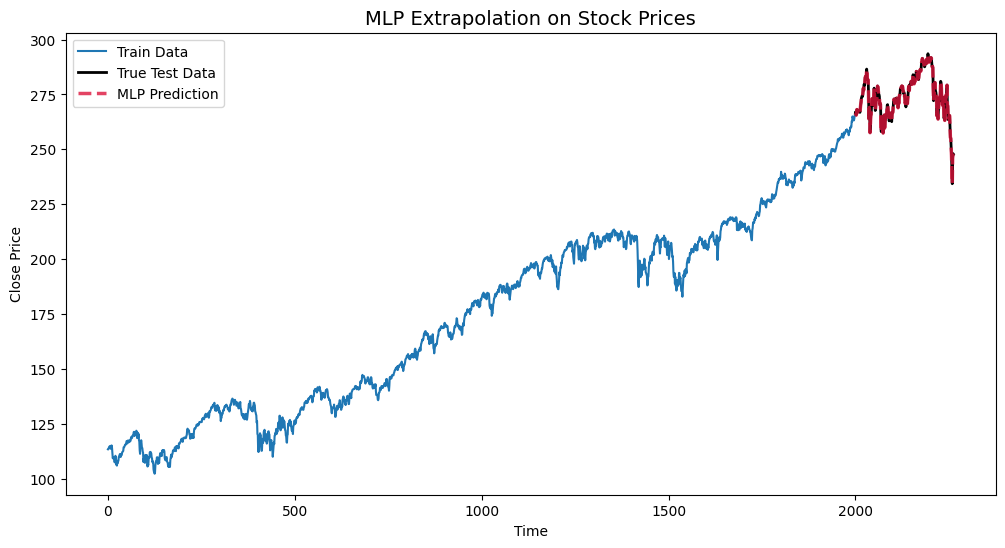

In [32]:
# 6️⃣ ترسیم نتایج
# ---------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(range(len(train)), train, label='Train Data')
plt.plot(range(len(train), len(train) + len(test)), test, label='True Test Data', color='black', linewidth=2.0)
plt.plot(range(len(train), len(train) + len(y_pred)), y_pred, label='MLP Prediction', color='crimson', linestyle='--', linewidth=2.5, alpha=0.8)

plt.title("MLP Extrapolation on Stock Prices", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()